In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc

In [29]:
data = pd.read_csv("data.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


<AxesSubplot:>

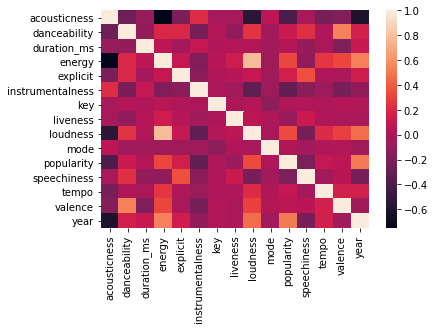

In [62]:
sns.heatmap(data.corr())

Явные зависимости:
  - чем больше громкость(loudness), тем больше енергия(energy) трека
  - чем больше энерги у трека, тем меньше его акустичность (наличие живых иструментов как я понял, или динамический диапозон)
  - чем более новый трек, тем меньше его акустичность

Менее явные зависимости:
  - чем больше громкость, тем меньше его акустичность
  - чем больше танцевальность (danceability) трека, тем больше его позитивность (valence)
  - чем более новый трек, тем более он энергичный
  - чем более новый трек, тем более он популярный? (мажорный или минорный трек)
  
вроде бы всё

# Энергия - громкость

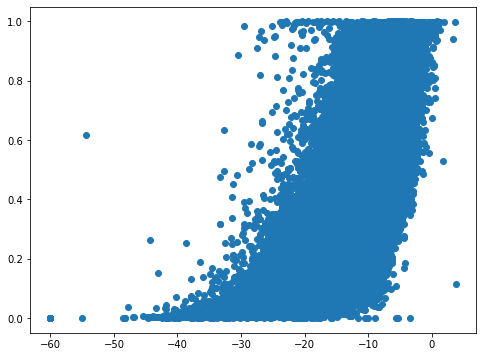

In [35]:
fig, axs = plt.subplots()
fig.set_size_inches((8, 6))
fig.set_dpi = 200

axs.scatter(data.loudness, data.energy)
#sns.jointplot("loudness", "energy", data=data[0:1000][["loudness", "energy"]], kind="kde", color="green")

# Исходя из графика, видно, что зависимость существует и совпадает с предположением

# Энергия - акустичность

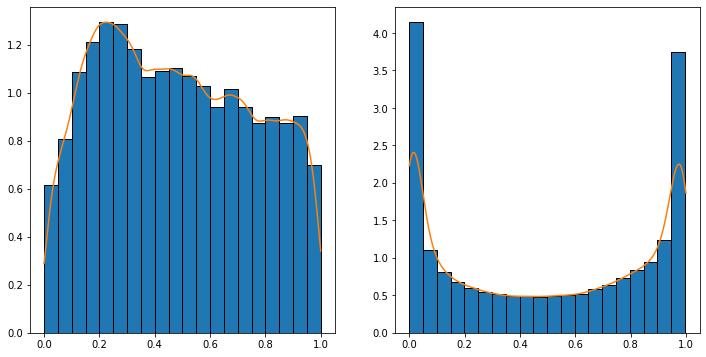

In [52]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((12, 6))
fig.set_dpi = 200

xx = np.linspace(0, 1, 1000)
kde1 = sc.stats.gaussian_kde(data.energy)
kde2 = sc.stats.gaussian_kde(data.acousticness)

axs[0].hist(data.energy, bins=20, edgecolor="black", density=True)
axs[0].plot(xx, kde1(xx))
axs[1].hist(data.acousticness, bins=20, edgecolor="black", density=True)
axs[1].plot(xx, kde2(xx))

# Исходя из графика, видно, что зависимость существует, но более сложная чем, просто линейная (скорее квадратичная)

# Год - акустичность

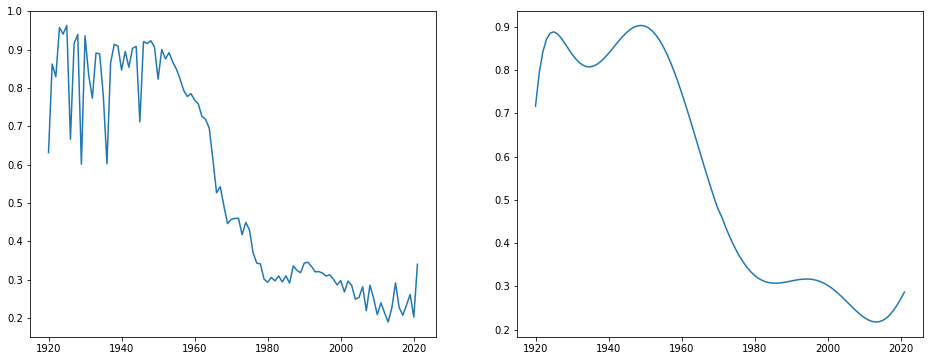

In [177]:
from scipy.signal import savgol_filter

fig, axs = plt.subplots(1, 2)
fig.set_size_inches((16, 6))
fig.set_dpi = 200

x = np.sort(data.year.unique())
y = data.groupby("year").acousticness.mean()

itp = sc.interpolate.interp1d(x, y, kind="linear")
yy = savgol_filter(itp(x), 101, 8)

axs[0].plot(x, y)
axs[1].plot(x, yy)

# Исходя из графика, видно, что существует отрицательная зависимость, что совпадает с предположением

# Акустичность - громкость

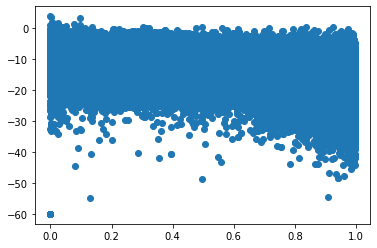

In [113]:
plt.scatter(data.acousticness, data.loudness)

# По графику видно, хоть и не явно, что точки уходят вниз с движением вправо.
# Какая-то зависимость есть, но нужно выбрать другой тип графика.

# Танцевальность - позитивность

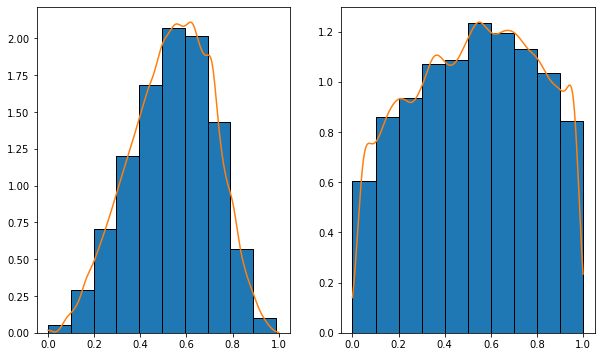

In [139]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((10, 6))
fig.set_dpi = 200

xx = np.linspace(0, 1, 1000)
kde1 = sc.stats.gaussian_kde(data.danceability)
kde2 = sc.stats.gaussian_kde(data.valence)

axs[0].hist(data.danceability, bins=10, edgecolor="black", density=True)
axs[1].hist(data.valence, bins=10, edgecolor="black", density=True)
axs[0].plot(xx, kde1(xx))
axs[1].plot(xx, kde2(xx))

# По графикам видно, что с ростом танцевальности трека, растёт и его позитивность? . Зависимость подтверждена

# Год - энергия

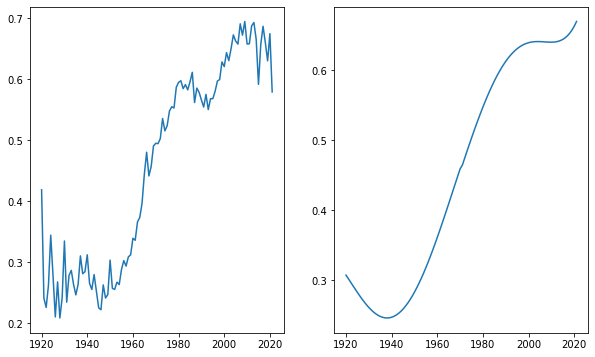

In [131]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((10, 6))
fig.set_dpi = 200

x = np.sort(data.year.unique())
y = data.groupby("year").energy.mean()

itp = sc.interpolate.interp1d(x, y, kind="linear")
yy = savgol_filter(itp(x), 101, 5)

axs[0].plot(x, y)
axs[1].plot(x, yy)

# По графику явно видна зависимость, что подтверждает предположеня

# Популярность - энергия

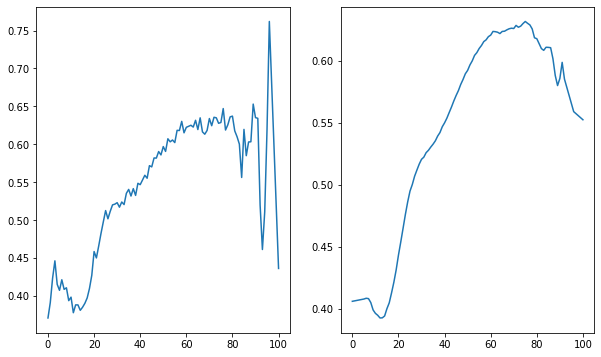

In [176]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((10, 6))
fig.set_dpi = 200

x = np.sort(data.popularity.unique())
y = data.groupby("popularity").energy.mean()

itp = sc.interpolate.interp1d(x, y, kind="linear")
yy = savgol_filter(itp(x), 11, 1)

axs[0].plot(x, y)
axs[1].plot(x, yy)

# По графику видна зависимость, что подтверждает предположеня